# <!-- Importing Dependancies -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

# <!-- Data Preprocessing -->

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape


(20640, 10)

In [4]:
df1=pd.get_dummies(df['ocean_proximity'])
df1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [5]:
df=df.drop("ocean_proximity",axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
df= pd.concat([df,df1],axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [7]:
df.shape

(20640, 14)

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.shape

(20433, 14)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

# <!-- Data Visualization -->

<AxesSubplot:>

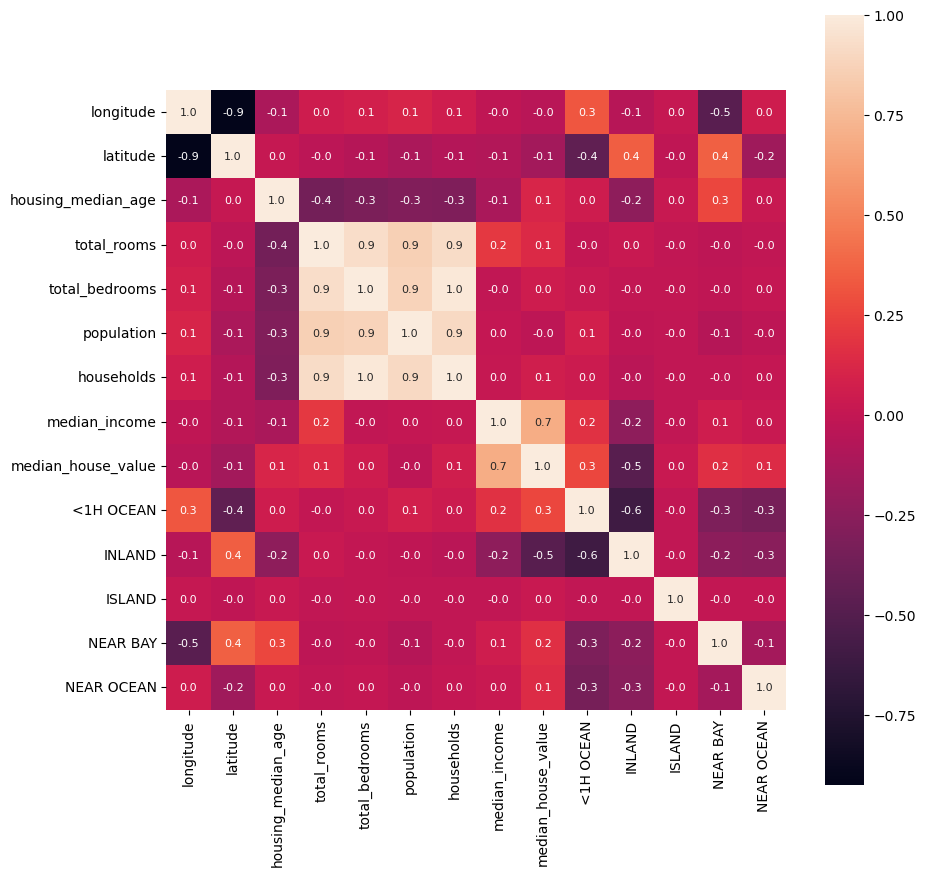

In [12]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [13]:
X=df.drop("median_house_value",axis=1)
y=df['median_house_value']

# <!-- Data Spliting -->

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<!-- We perform feature scaling to standardize the range of features or variables in our dataset. This is important because many machine learning algorithms assume that all features are on a similar scale and have similar variances. If the features are not on the same scale, some features may dominate over others in terms of their impact on the model's predictions. -->

# <!-- Feature scaling -->

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<!-- We perform feature scaling to standardize the range of features or variables in our dataset. This is important because many machine learning algorithms assume that all features are on a similar scale and have similar variances. If the features are not on the same scale, some features may dominate over others in terms of their impact on the model's predictions.

StandardScaler is a popular method for feature scaling. It transforms the features by subtracting the mean and dividing by the standard deviation of each feature. This results in features with zero mean and unit variance, which ensures that all features have a similar scale. -->

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

<!-- the MAE can be an intuitive metric for predicting housing prices. By measuring the mean absolute difference between actual and predicted values, it provides a more relatable metric that allows us to understand how much the predictions deviate on average.  -->
<!-- The R-squared metric, or R2, provides an indication of how well a regression model fits the data.
R-squared, also known as the coefficient of determination -->

In [19]:
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Absolute Error: 50397.38168031163
R-squared Score: 0.6488732915769895


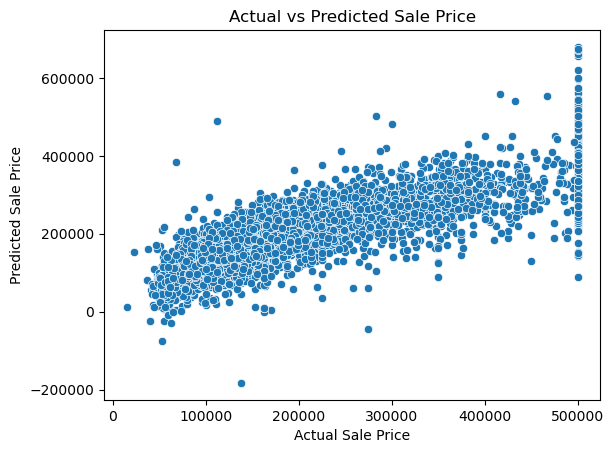

In [20]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

In [21]:
y_pred.shape

(4087,)

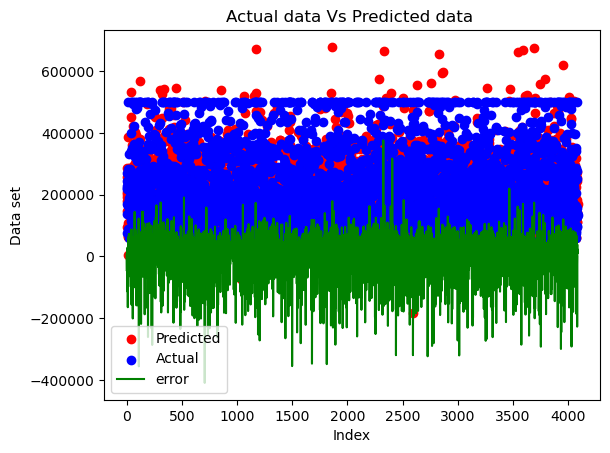

In [22]:
c=[i for i in range(0,4087)]#generating index
plt.scatter(c,lr.predict(X_test),color='r',label="Predicted")
plt.scatter(c,y_test,color='b',label="Actual")
plt.plot(c,(lr.predict(X_test)-y_test),color='g',label="error")
plt.title("Actual data Vs Predicted data ")
plt.xlabel("Index")
plt.ylabel("Data set")
plt.legend()

In [23]:
from xgboost import XGBRegressor
mxg=XGBRegressor()

<!-- The main significance of XGBoost for regression tasks is its ability to create complex models with high accuracy. XGBoost uses a combination of decision trees and gradient boosting algorithms to create a model that can accurately predict the output for a given input. -->


In [24]:
mxg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y_pred_mxg = mxg.predict(X_test)

In [26]:
mae_mxg = mean_absolute_error(y_test, y_pred_mxg)
r2_mxg = r2_score(y_test, y_pred_mxg)

print("Mean Absolute Error:", mae_mxg)
print("R-squared Score:", r2_mxg)


Mean Absolute Error: 32508.97375443479
R-squared Score: 0.8226253199346569


# Here Xgboost model has reduced the MAE and increased the r2 score to make the model more fitting to the data

<!-- Here the Xgboost model has reduced the MAE and increased r2 making the model more fitting to the data -->

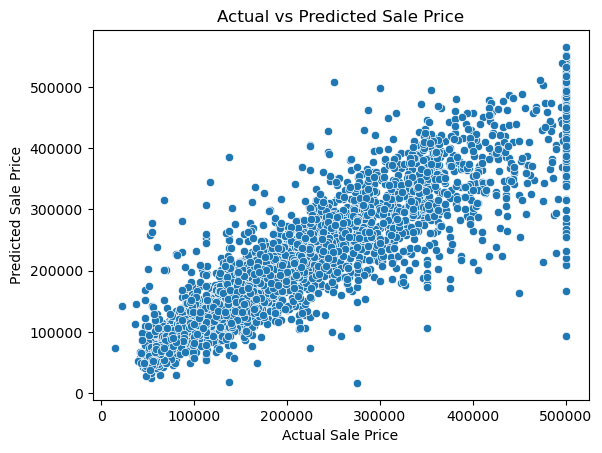

In [27]:
sns.scatterplot(x=y_test, y=y_pred_mxg)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()